In [1]:
import GAN.models as models
import ganja.io as io
import ganja.utils as utils
import ganja.plotting as plotting
import ganja.preprocessing as preprocessing
import ganja.plotting as plotting

import json


import matplotlib
matplotlib.style.use('seaborn-poster')


Using TensorFlow backend.


Welcome to JupyROOT 6.10/02


In [2]:
from  keras.models import load_model

In [187]:
target = 'log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/'


STOCHASTIC_LAYER=False
with open(target+'/config.json') as fin:
    training_parameters = json.loads(fin.read())
    
globals().update(training_parameters)

training_parameters

{'BASE_FOLDER': '/scratch/snx3000/musella/ganja/split',
 'BATCH': True,
 'BATCH_SIZE': 256,
 'COMPRESSED': False,
 'COND_VARIABLES': ['ptGen', 'etaGen', 'phiGen', 'nPU'],
 'DECODING_FILTER_SIZE': 3,
 'DECODING_LAST_PLATEAU': 2,
 'DISC_DO_TOTAL': True,
 'DISC_NFILTERS': 4,
 'DISC_OBO_LAYERS': 0,
 'DISC_OBO_NCH': 0,
 'DISC_OBO_NCH_MIN': 4,
 'DISC_OBO_NCH_RED': 0,
 'DISC_TOTAL_LAYERS': [64, 64, 32, 16],
 'ENCODING_FILTER_SIZE': 3,
 'EPOCHS': 15,
 'GAN_LOSS': 'binary_crossentropy',
 'GAN_TOTAL_WEIGHT': 5.0,
 'IMG_SIZE': 32,
 'LOAD_GENERATOR_WEIGHTS': '',
 'LOSS': 'SoftMaskWeightedMeanSquaredErrorWithTotal',
 'LOSS_ALPHA': 1.0,
 'LOSS_LMBD': 1.0,
 'LOSS_RADIAL_WEIGHTS': False,
 'LOSS_TAU': 1e-05,
 'LOSS_TAU2': 0.0,
 'LOSS_USE_LAST': False,
 'LOSS_WEIGHT': 1.0,
 'LR': 0.0002,
 'MAX_ENCODING': 16,
 'MOMENTS': 'moments_nov2.npz',
 'MONITOR_DIR': 'log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1',
 'NFILTERS': 8,
 'NOISE_DIM': 0,
 'NTRAIN': 4,
 'NVALID': 1,
 'N_ENCODING': 6,
 'SOFT_MASK'

In [4]:
# metrics = df.read_csv(target+'/')

In [5]:
import os

with open(BASE_FOLDER+'/'+VERSION+'/train_valid_test.json') as fin:
    split_map = json.loads(fin.read())


In [6]:
test_inputs = {os.path.join(BASE_FOLDER,VERSION) : split_map['test'][:1]}

moments = np.load(MOMENTS.format(VERSION=VERSION))
reco_moments = moments['reco_mean'],moments['reco_std'],0.02
gen_moments = moments['gen_mean'],moments['gen_std'],0.02

weights = np.load(WEIGHTS.format(VERSION=VERSION),encoding='latin1')
weights = weights[0],weights[2:],weights[1]

In [7]:

test_reader = io.Reader(test_inputs,weights,compressed=COMPRESSED,cond_names=COND_VARIABLES,noise_dim=NOISE_DIM,
                       )#aux_noise=STOCHASTIC_LAYER)#,gen_moments=gen_moments)


In [8]:
ret = test_reader.get()
X_test,y_test = ret[0:2]
w_test = ret.pop(-1)

if test_reader.aux_noise:
    ret[-1] = ret[-1][:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]
inputs_test = [X_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]]+ret[2:]

#X_unnorm = preprocessing.unnormalize(X_test,*gen_moments)
X_unnorm = X_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]
y_test = y_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]

In [9]:
# X_unnorm = X_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]
# y_test = y_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]

In [10]:
previous = None

In [188]:
weights = ! ls -t $target/model*.hdf5
print("\n".join(weights))

latest = weights[0]
latest = weights[-6]
print('\n\nlatest '+latest)

log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-14.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-13.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-12.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-11.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-10.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-9.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-8.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-7.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-6.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-5.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-4.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-3.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-2.hdf5
log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-1.hdf5
log/unnorm_nt4_

In [189]:
import keras.backend as K
import ganja.losses

reload(ganja.losses)
from GAN.unet import StochasticThreshold
if latest != previous:
    print('loading model '+latest)
    model = load_model(latest,custom_objects=dict(StochasticThreshold=StochasticThreshold),compile=False)
    previous = latest

loading model log/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1//model-4.hdf5


In [190]:
print(getattr(model,"loss",None))

None


In [191]:
run_inputs = [ x[:50000] for x in inputs_test ]

%time raw_pred = model.predict(run_inputs)

CPU times: user 4min 51s, sys: 50.2 s, total: 5min 41s
Wall time: 41.6 s


In [192]:
if type(raw_pred) == list:
    y_pred = raw_pred[1]
    y_pred0 = raw_pred[0]
else:
    y_pred = raw_pred
    y_pred0 = None

In [193]:
# if LOSS_ALPHA != 1. and y_pred.shape[-1]>1:
#     y_pred[:,:,:,1] = ( LOSS_ALPHA * y_pred[:,:,:,1] ) / ( 1. + (1-LOSS_ALPHA) * y_pred[:,:,:,1] )

if y_pred.shape[-1] >1:
    y_pred_val,y_pred_prob = y_pred[:,:,:,0:1],y_pred[:,:,:,1:]
else:
    y_pred_val,y_pred_prob = y_pred,None

In [194]:
plots_folder = "plots/%s" % os.path.basename(target.rstrip("/"))
epoch = latest.split("-")[1].replace(".hdf5","")
plots_folder = plots_folder+"/"+epoch
!mkdir -p $plots_folder

In [195]:
print(plots_folder)

plots/unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4


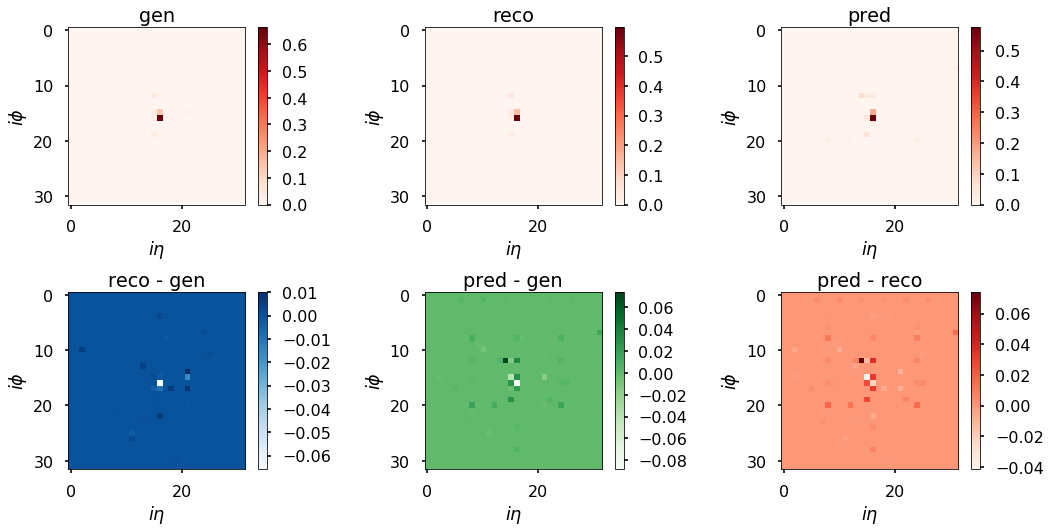

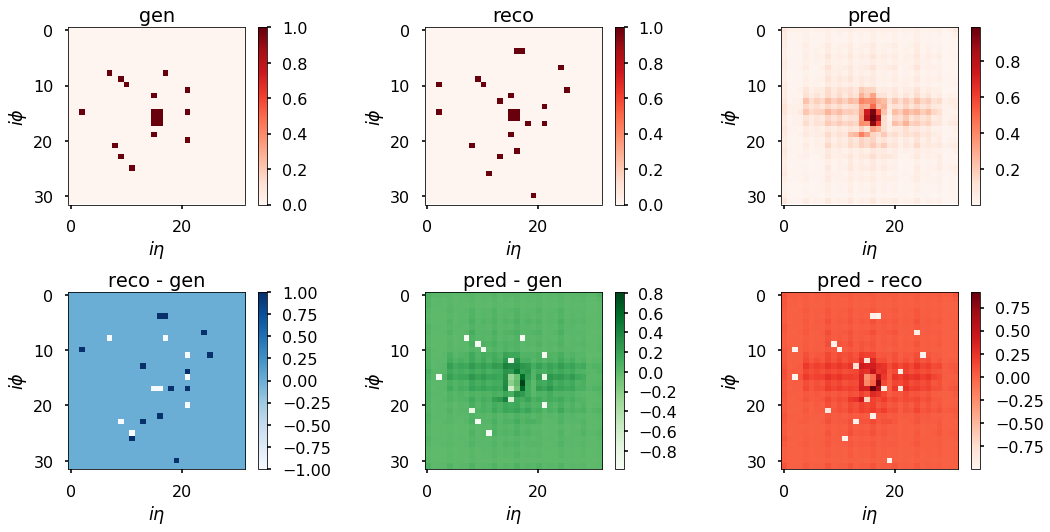

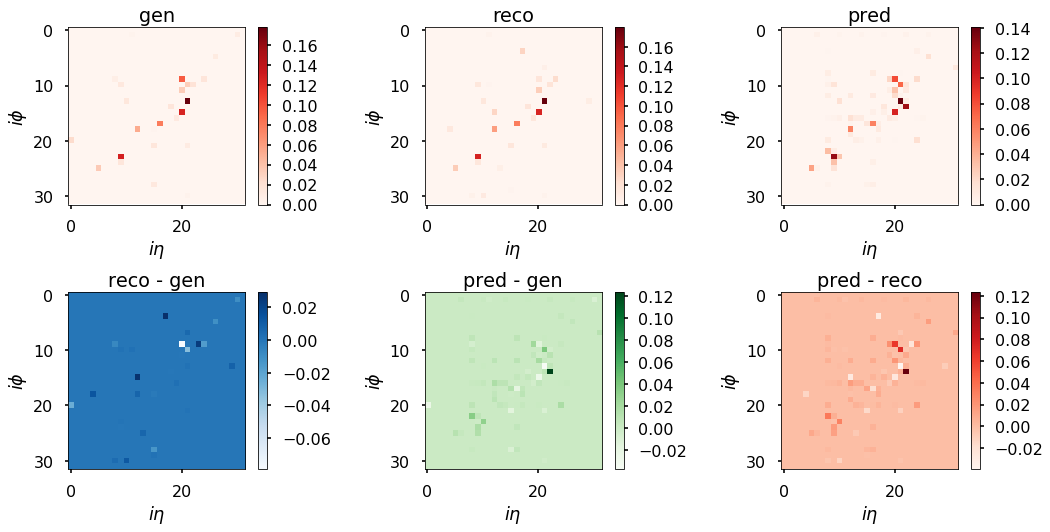

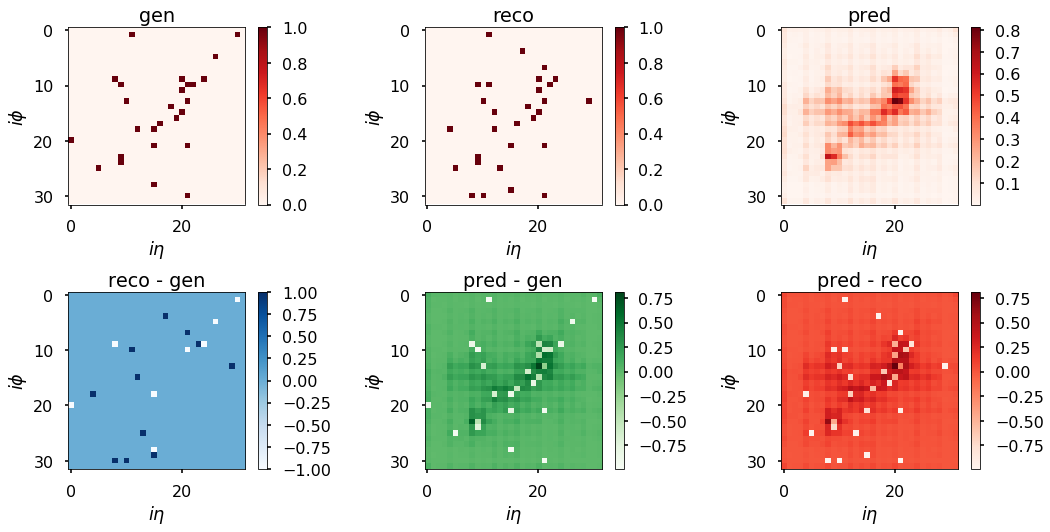

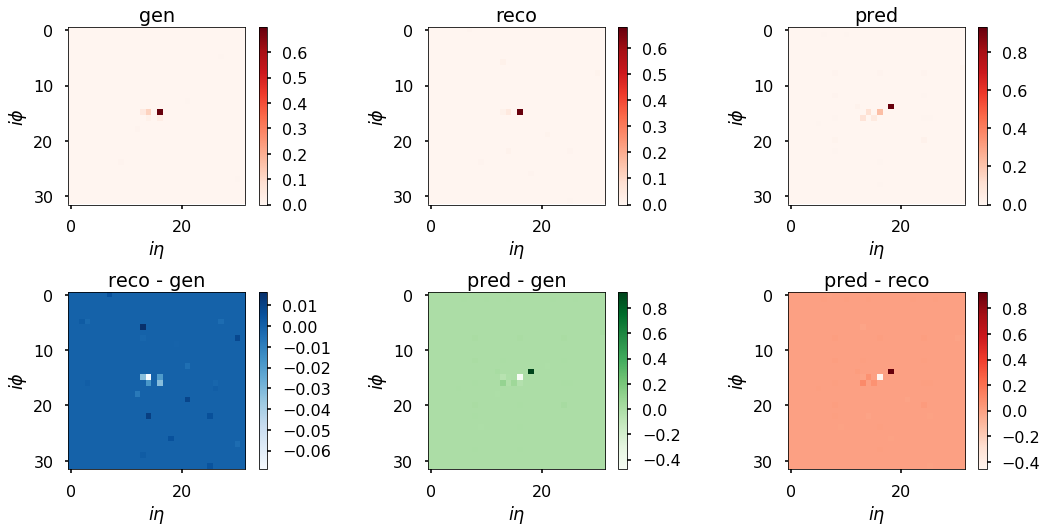

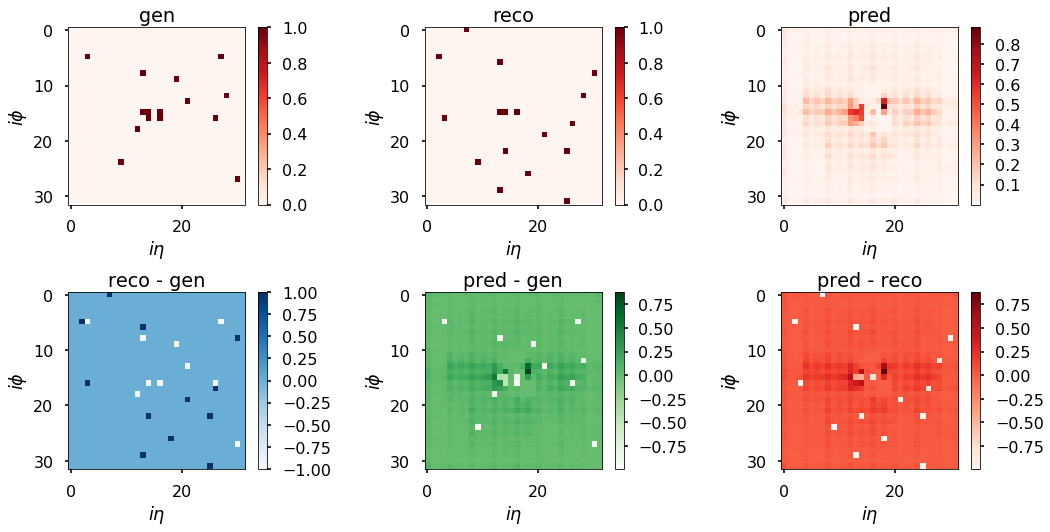

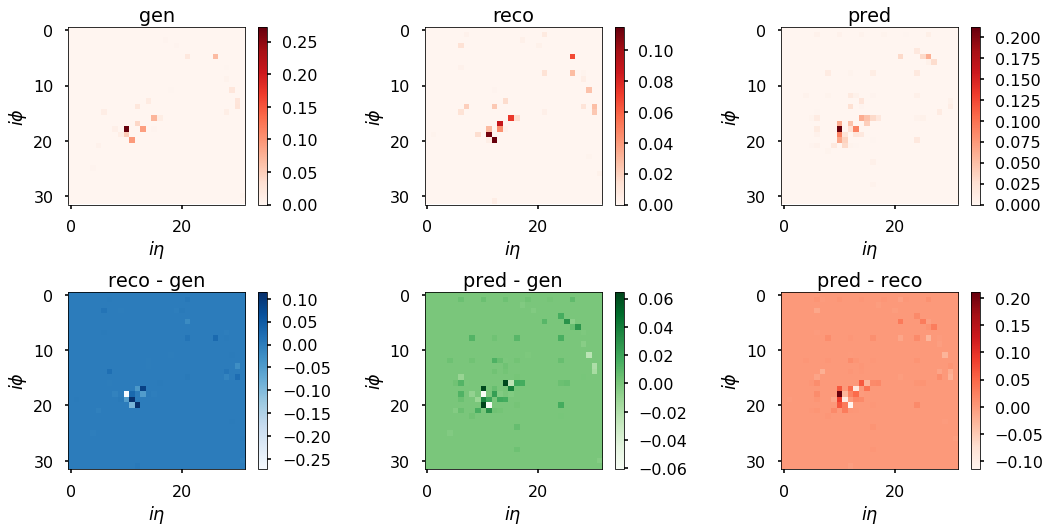

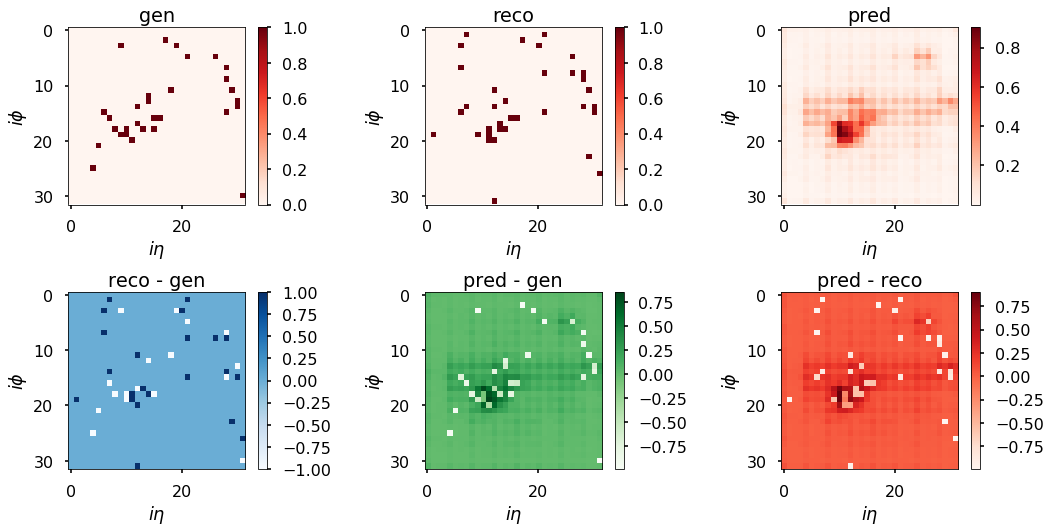

In [196]:
reload(plotting)

sample = np.random.choice(np.arange(0,y_pred_val.shape[0]),4)

for img in sample:
    plotting.show_prediction(img,X_unnorm[:,:32,:32],y_test[:,:32,:32],y_pred_val)
    plt.show()
    plt.savefig('%s/jet_pred_val_%d.png' % (plots_folder,img))
    if y_pred_prob is not None:
        plotting.show_prediction(img,np.greater(X_unnorm[:,:32,:32],0.).astype(np.float32),np.greater(y_test[:,:32,:32],0.).astype(np.float32),y_pred_prob)
        plt.savefig('%s/jet_pred_mask_%d.png' % (plots_folder,img))
        plt.show()

In [197]:
def generate_jets(pred_val,pred_prob,rescale=True):
    pred = pred_val*(np.random.uniform(size=pred_val.shape) < pred_prob)
    if rescale:
        pred_scl = np.sum(pred_val*pred_prob,axis=(1,2),keepdims=True)/np.sum(pred,axis=(1,2),keepdims=True)
        pred *= pred_scl
    return pred

gen = X_unnorm[:y_pred_val.shape[0],:32,:32,:]
reco = y_test[:y_pred_val.shape[0],:32,:32,:]
if y_pred_prob is not None:
    pred_noscl  = generate_jets(y_pred_val,y_pred_prob,False)
    pred  = generate_jets(y_pred_val,y_pred_prob,False)
    pred1 = generate_jets(y_pred_val,y_pred_prob,False)
    pred2 = generate_jets(y_pred_val,y_pred_prob,False)
    pred3 = generate_jets(y_pred_val,y_pred_prob,False)
    pred4 = generate_jets(y_pred_val,y_pred_prob,False)
else:
    pred = y_pred_val
    pred_noscl = pred


42417


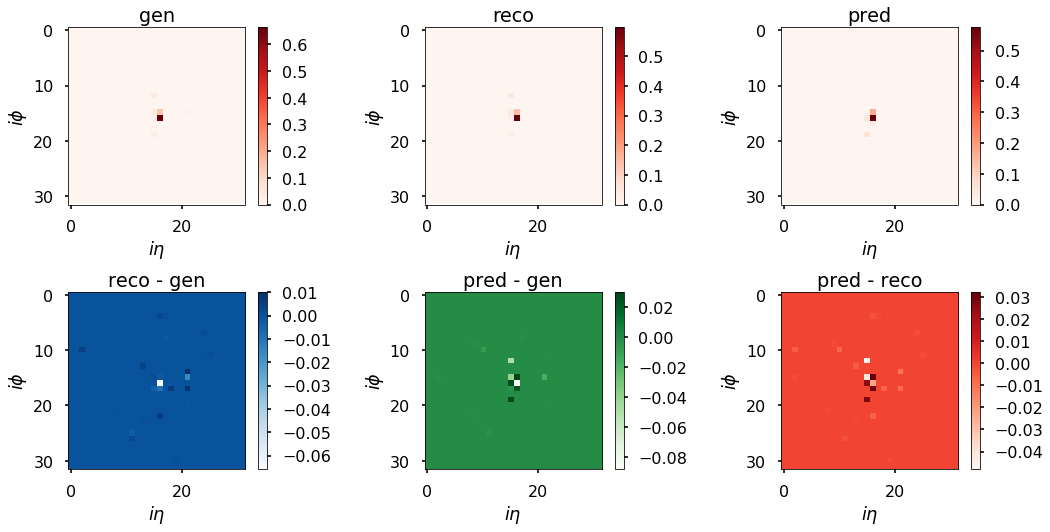

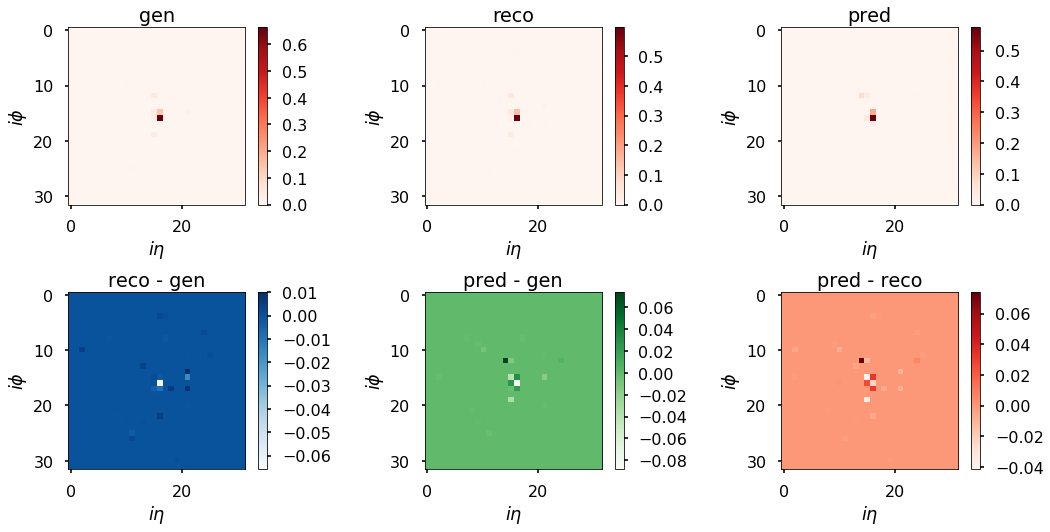

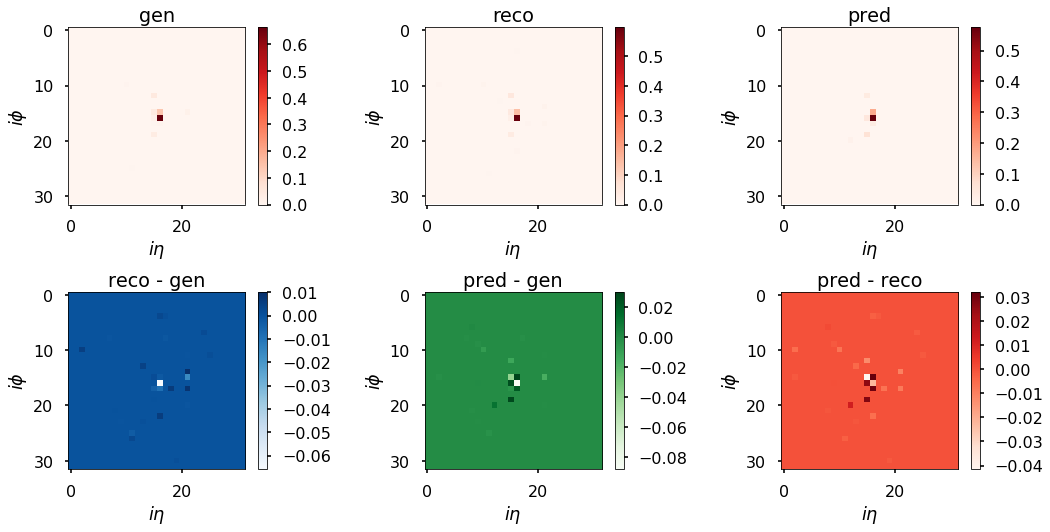

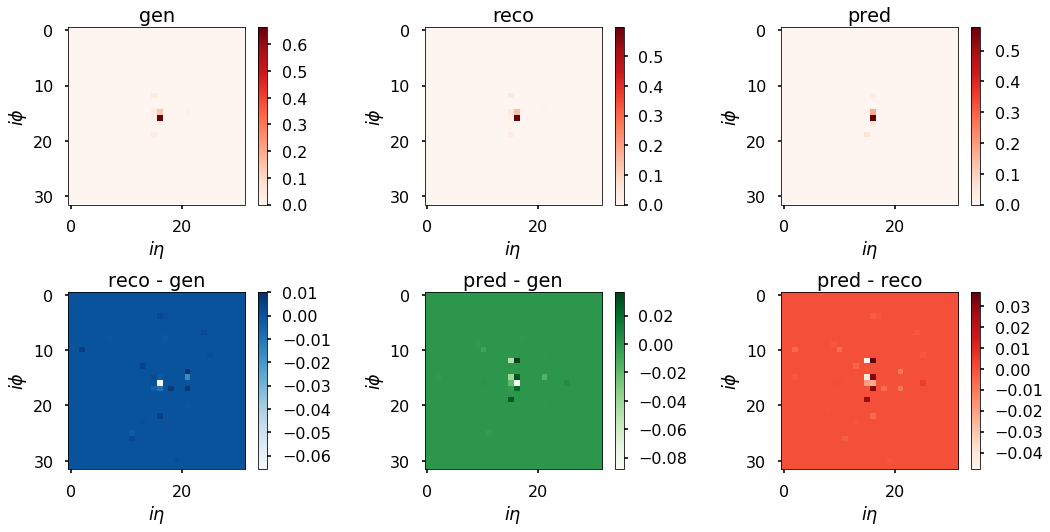

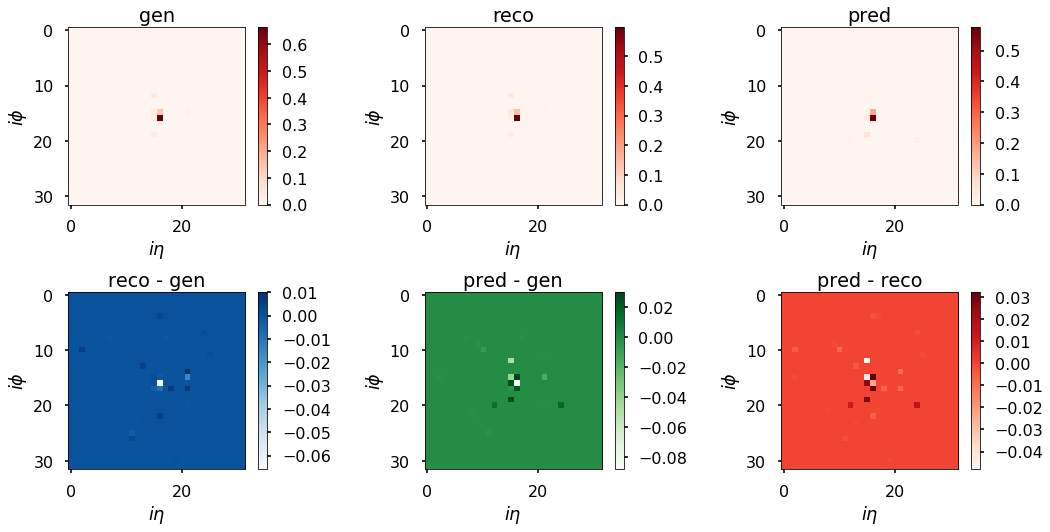

8677


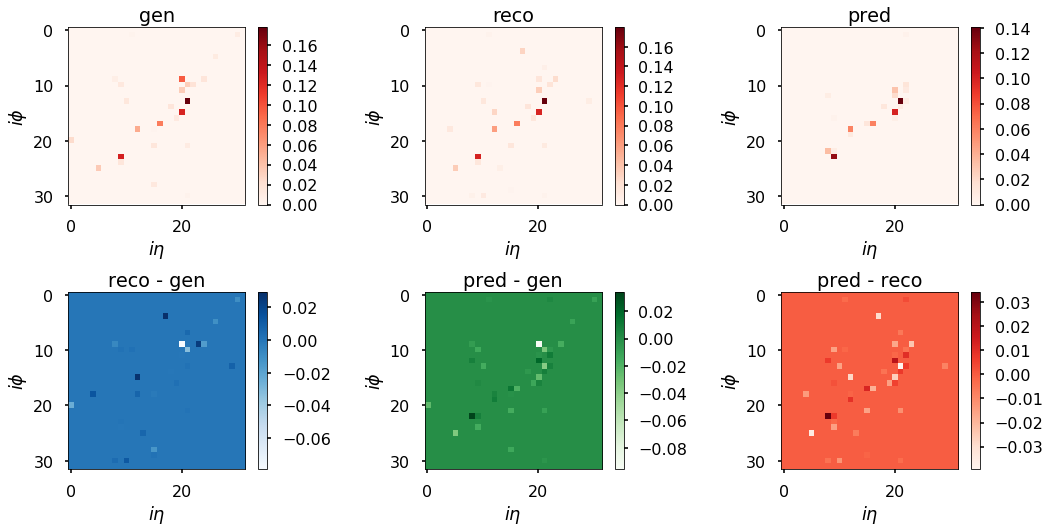

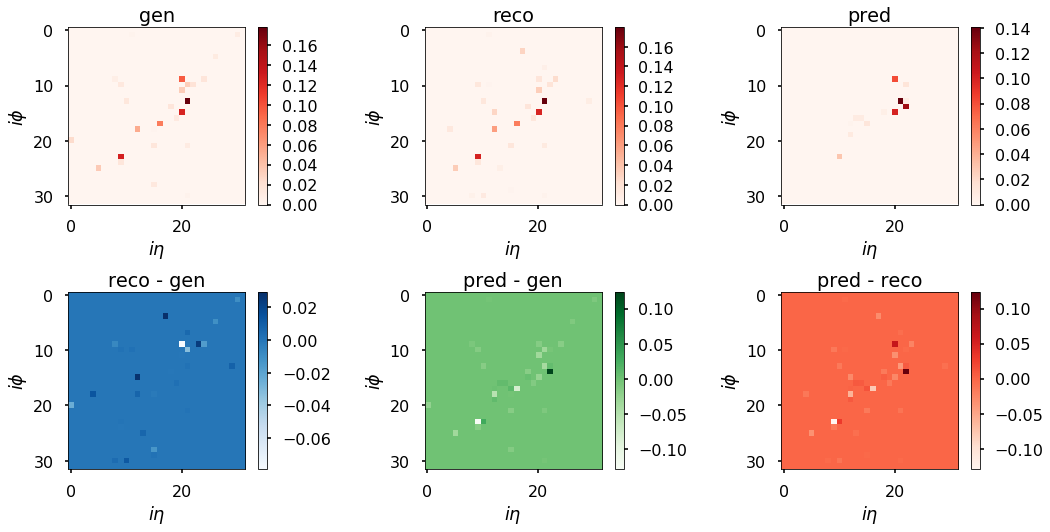

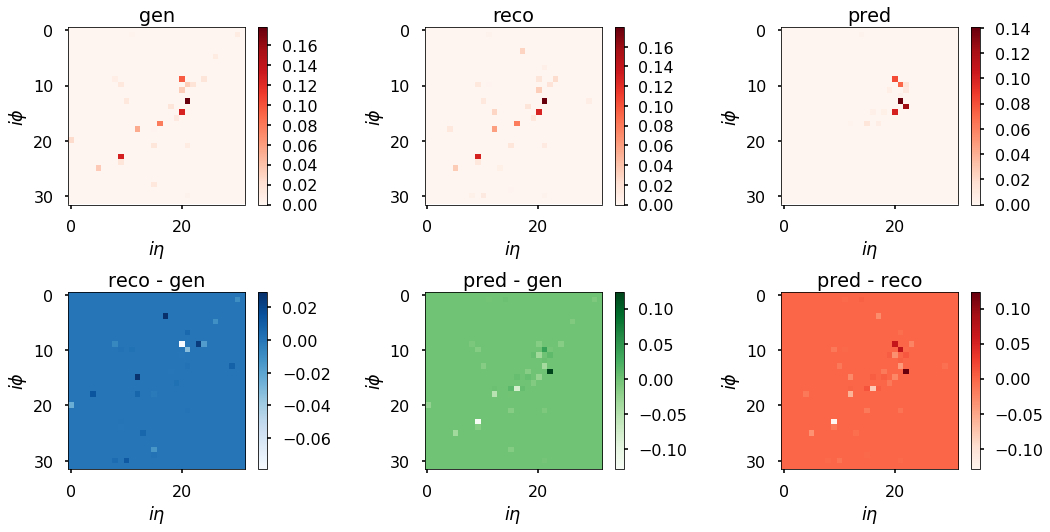

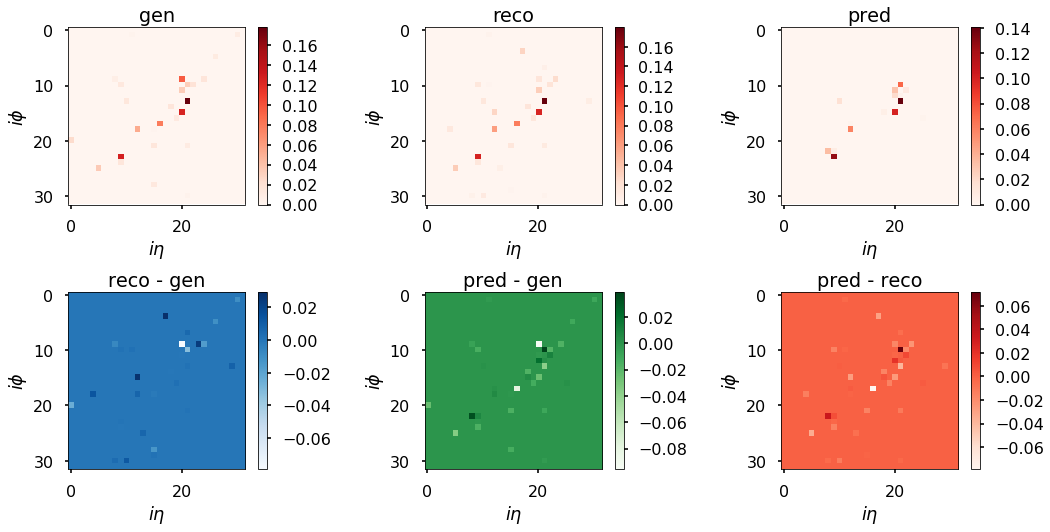

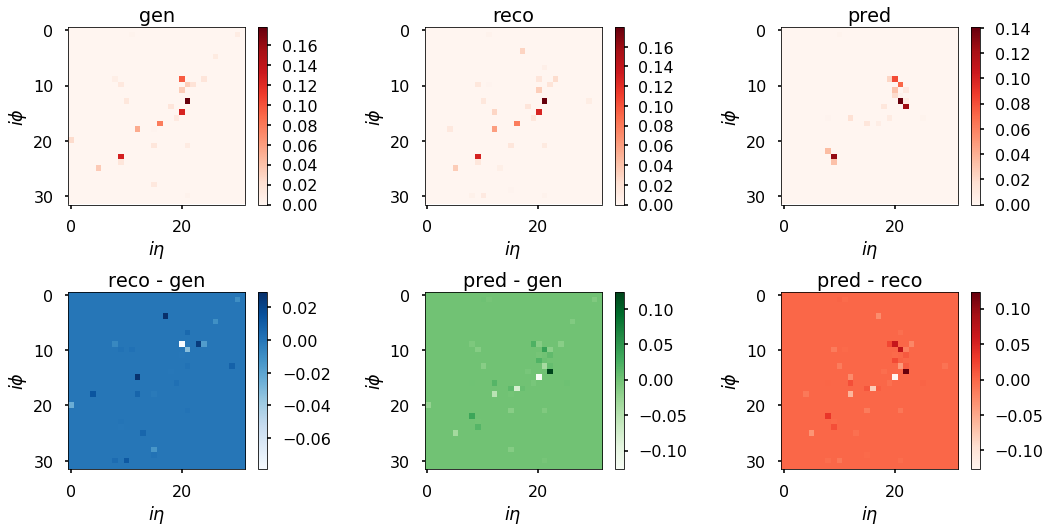

46871


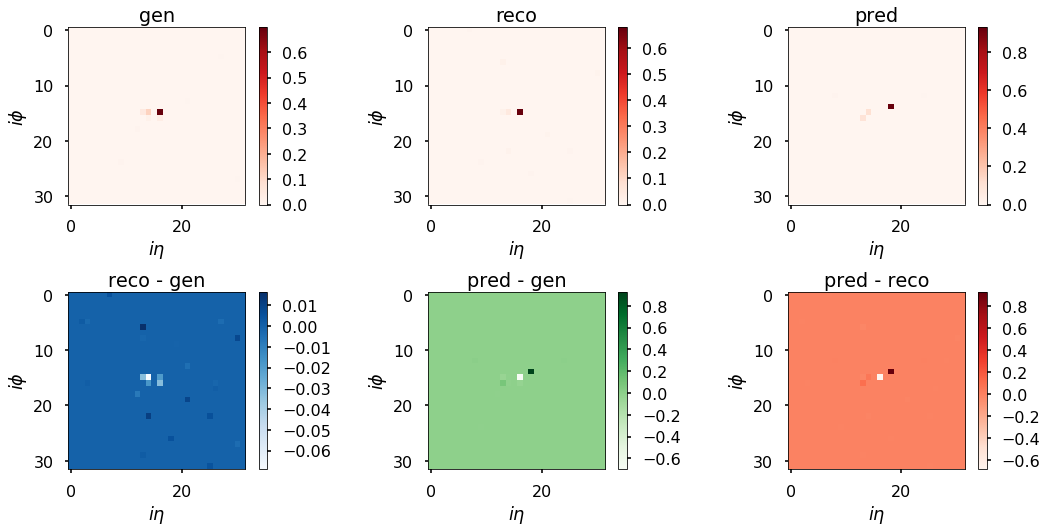

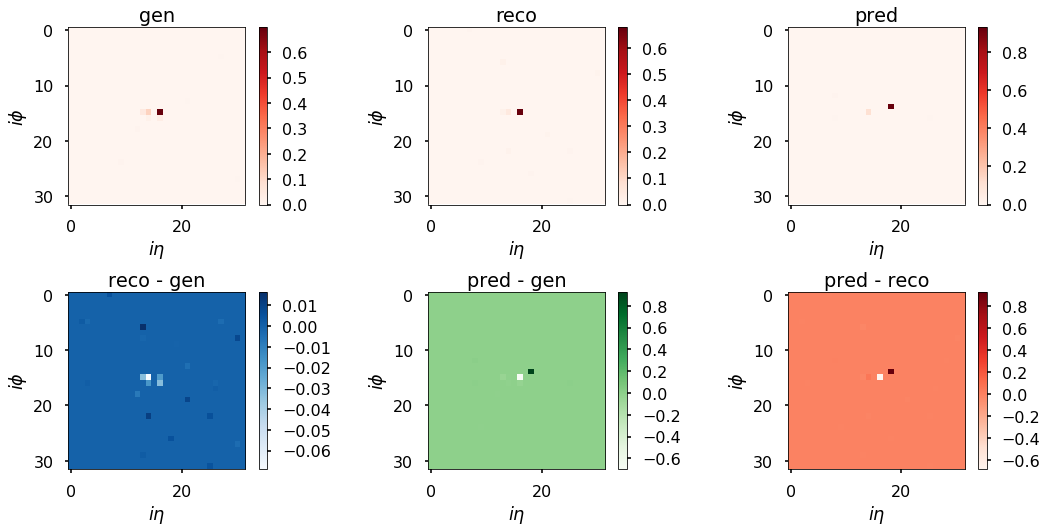

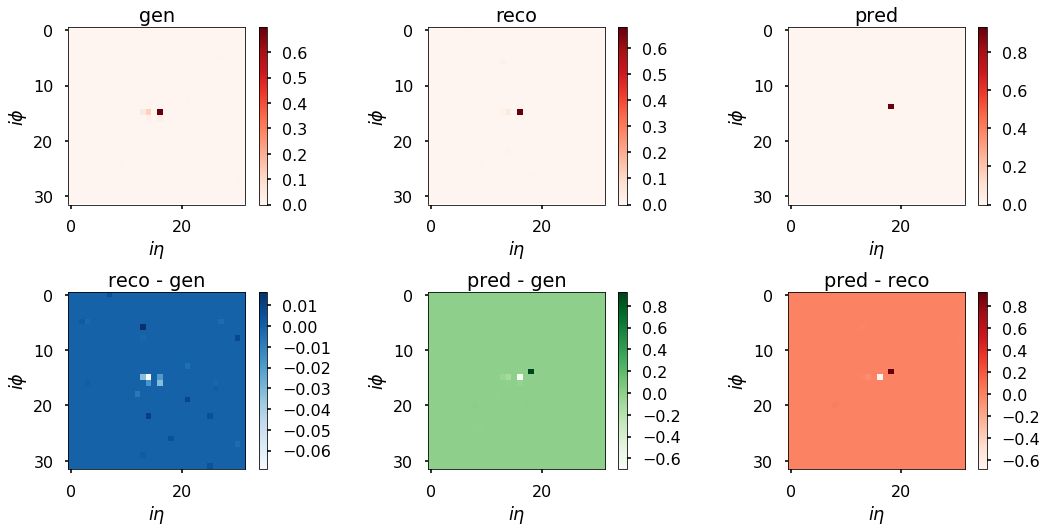

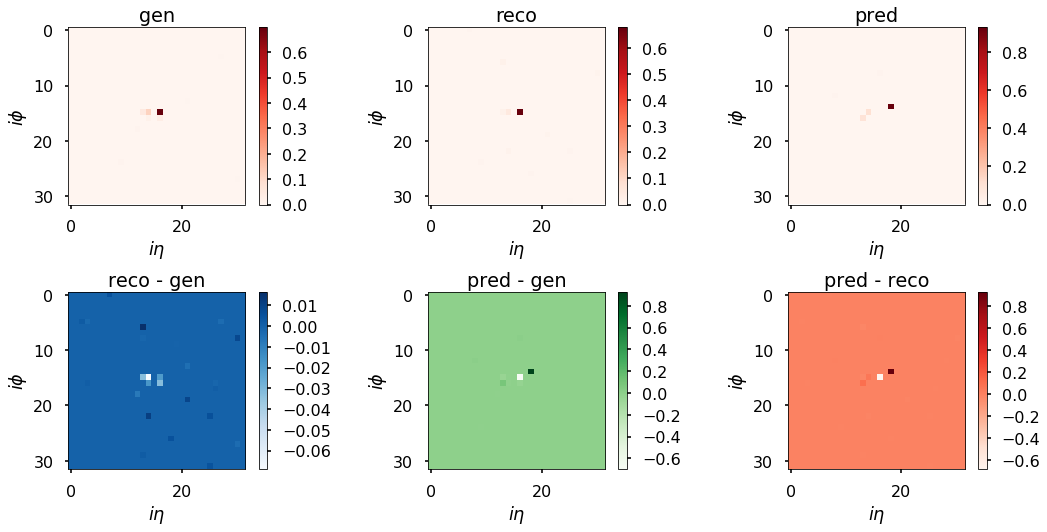

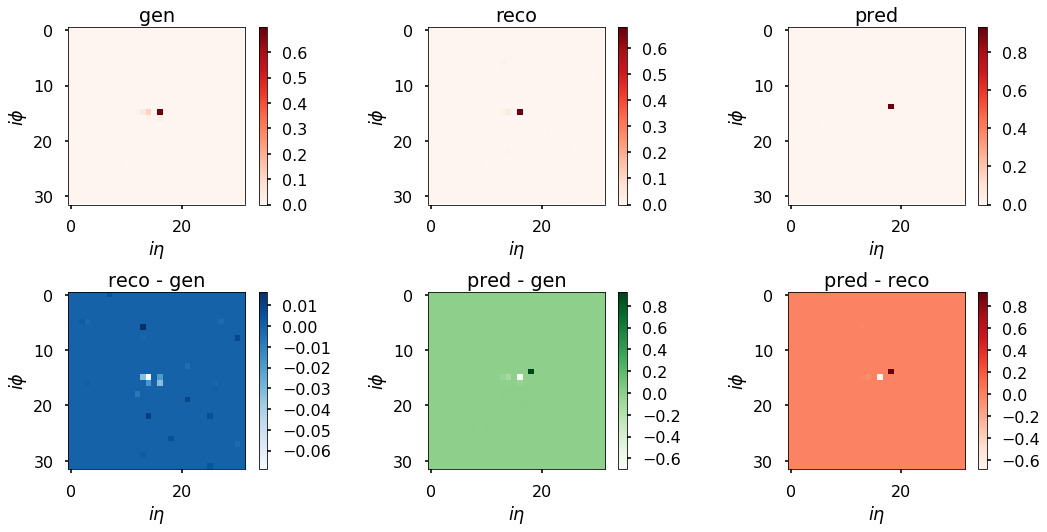

36838


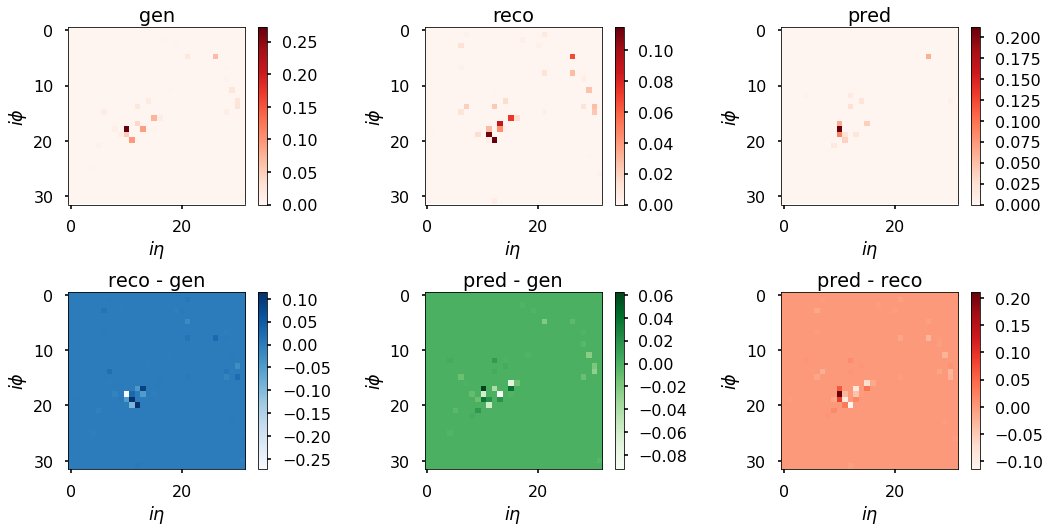

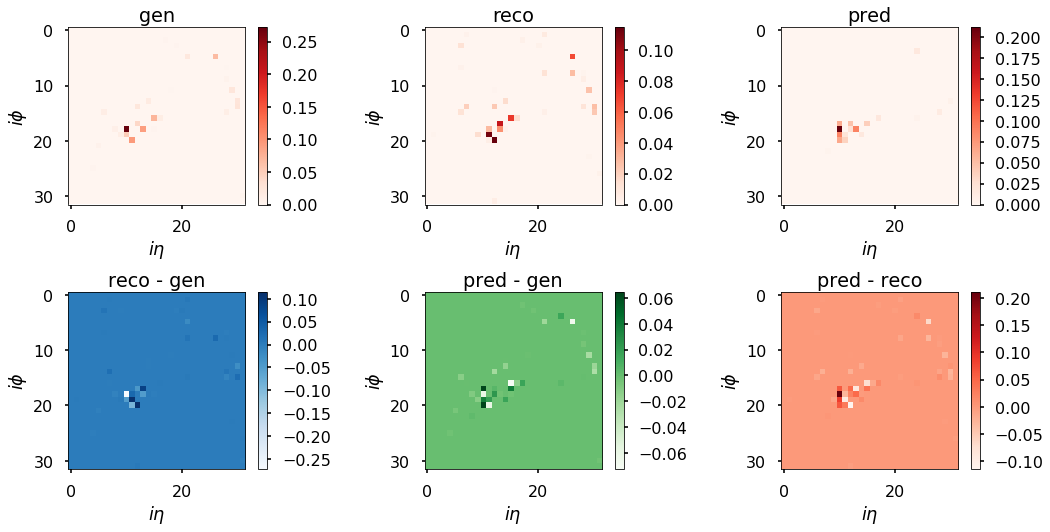

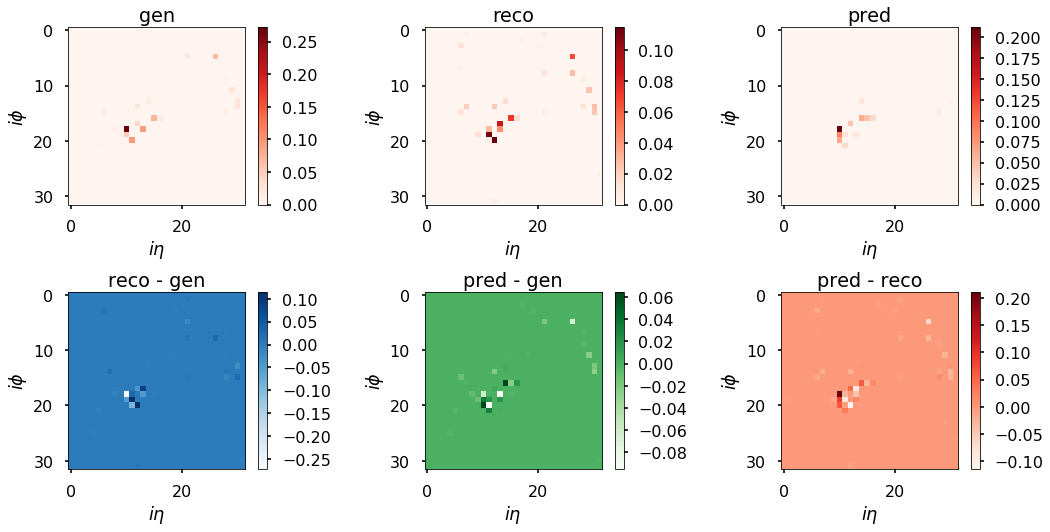

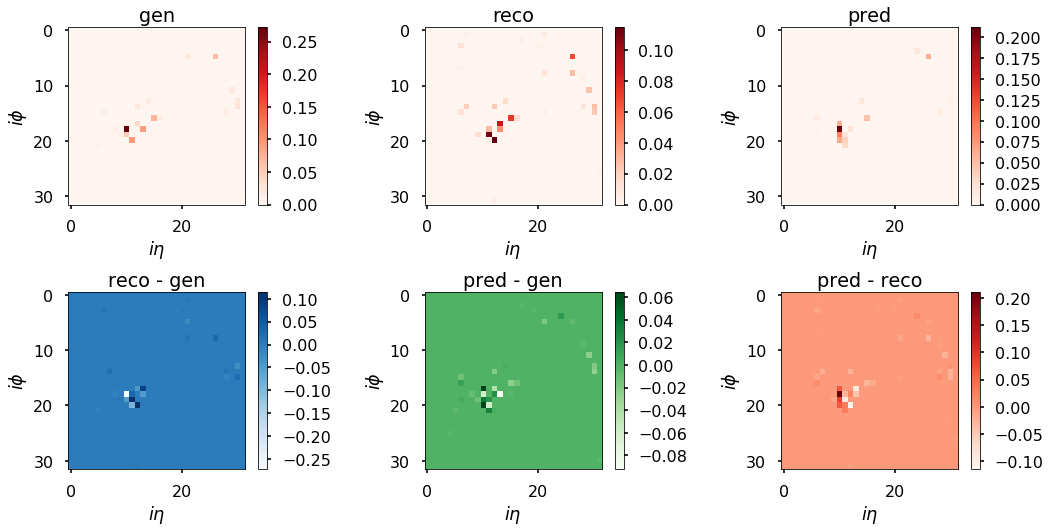

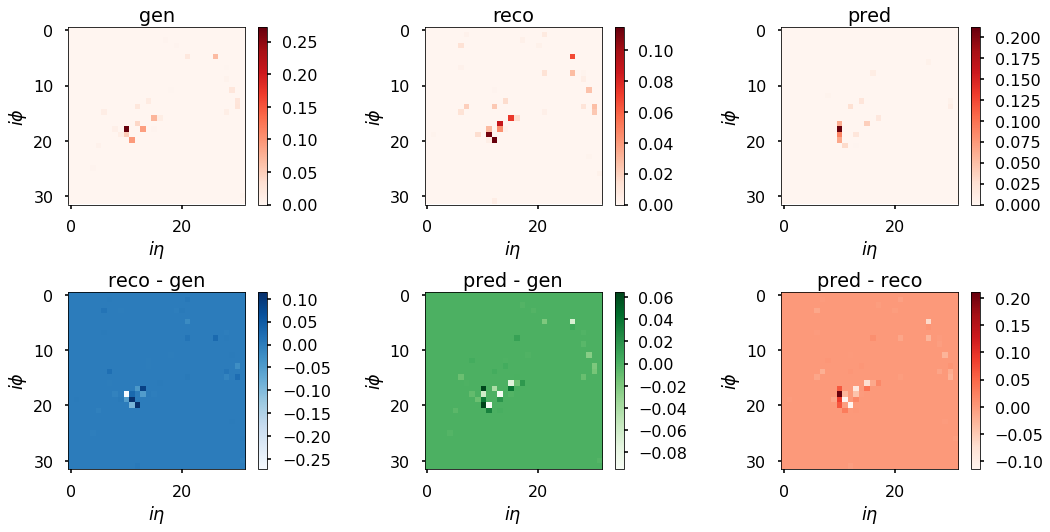

In [198]:
if y_pred_prob is not None:
    for img in sample:
        print(img)
        if y_pred0 is not None:
            plotting.show_prediction(img,gen,reco,y_pred0)
            plt.savefig('%s/jet_pred0_%d.png' % (plots_folder,img))
            plt.show()            
        for ip,ipred in enumerate([pred1,pred2,pred3,pred4]):
            plotting.show_prediction(img,gen,reco,ipred)
            plt.savefig('%s/jet_pred%d_%d.png' % (plots_folder,ip+1,img))
            plt.show()

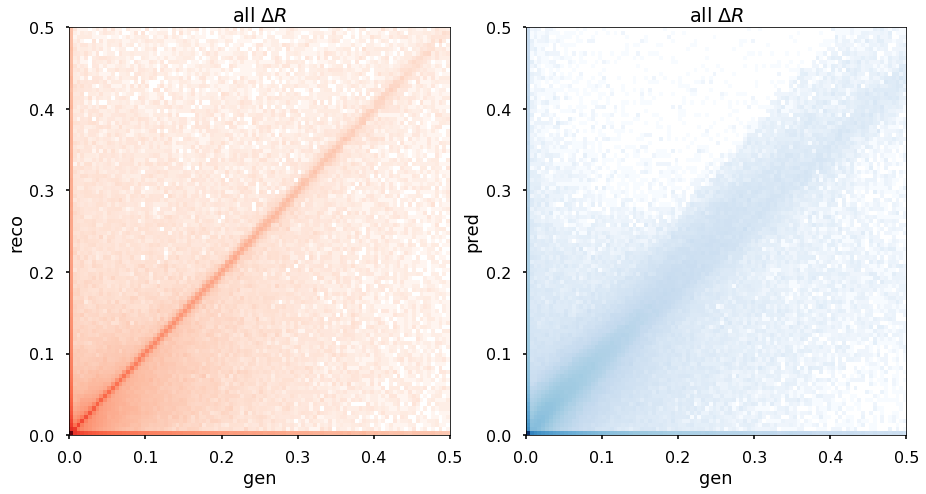

In [199]:
from matplotlib.colors import LogNorm 

# print(pred.dtype,reco.d)

reload(plotting)
plotting.scatter_pred(gen,reco,pred,None,title='all $\Delta R$',rng=[0,0.5])
plt.savefig('%s/scatter_pred.png' % plots_folder)

In [200]:
rings, ring_masks = plotting.make_masks([0.3, 0.2, 0.15, 0.1, 0.05, 0.],npix=IMG_SIZE/2,rad=0.3*IMG_SIZE/32.)

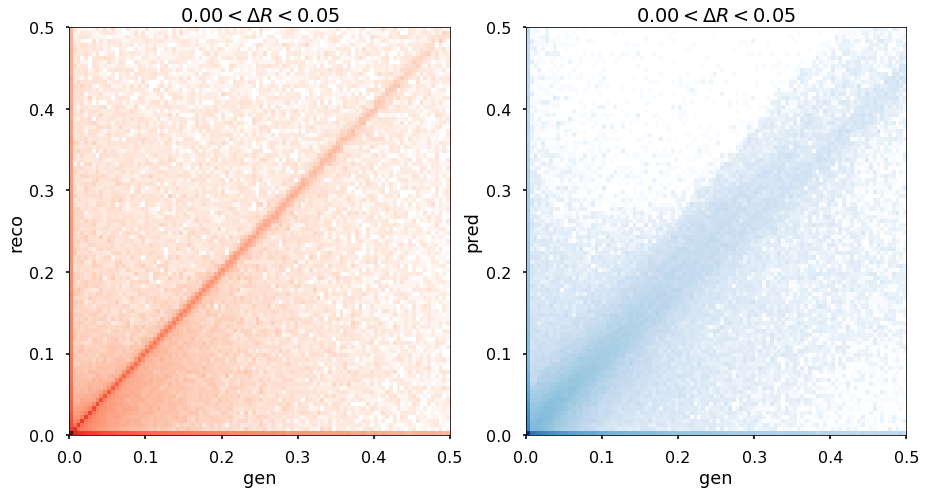

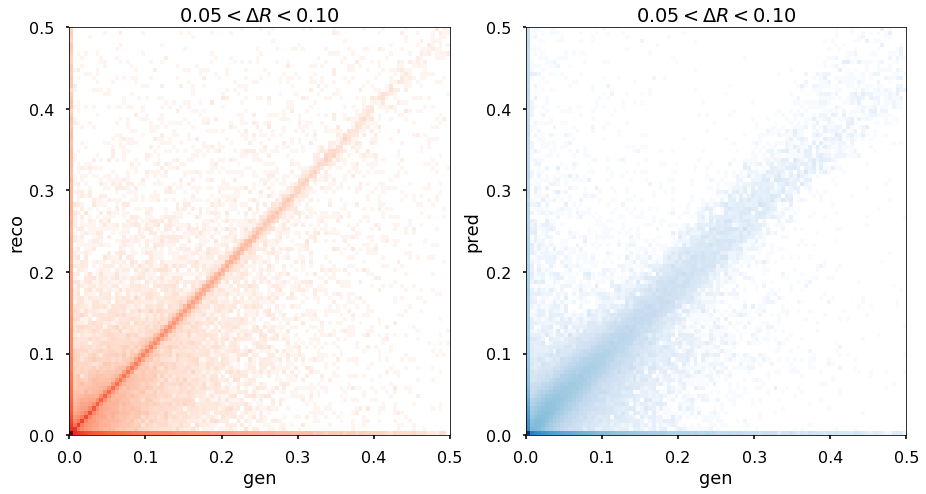

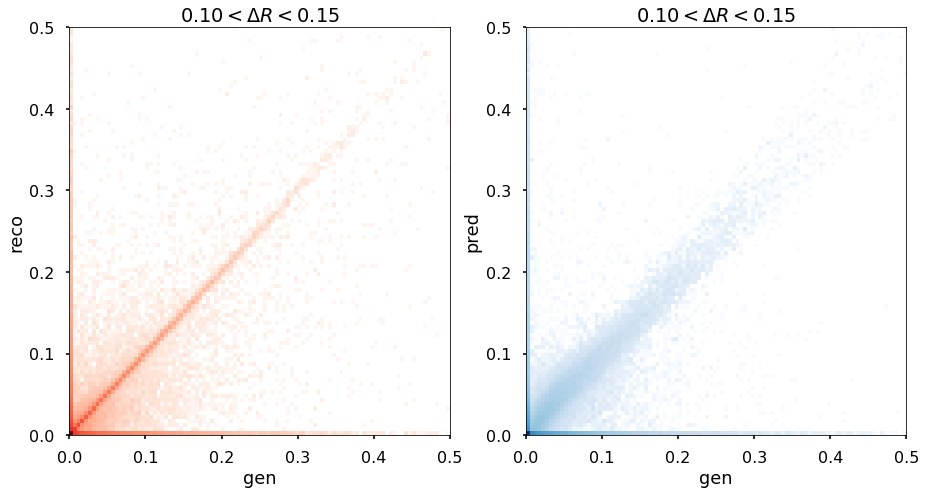

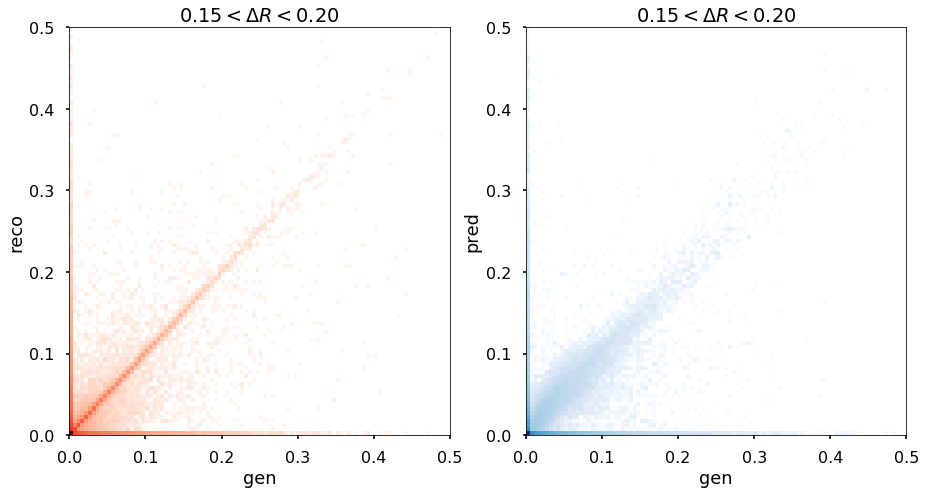

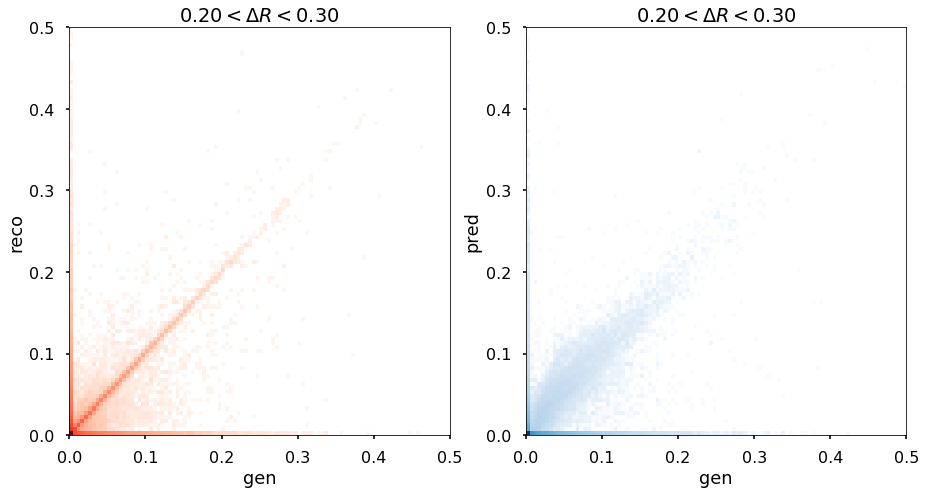

In [201]:
for iring,(ring,mask) in enumerate(zip(rings,ring_masks)):
    plotting.scatter_pred(gen,reco,pred,mask,title="$%1.2f < \Delta R < %1.2f$" % ring, rng=[0.,0.5] )
    plt.savefig('%s/scatter_pred_%d.png' % (plots_folder, iring ) )

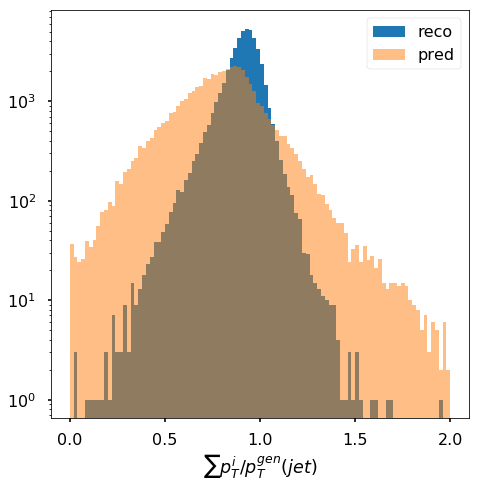

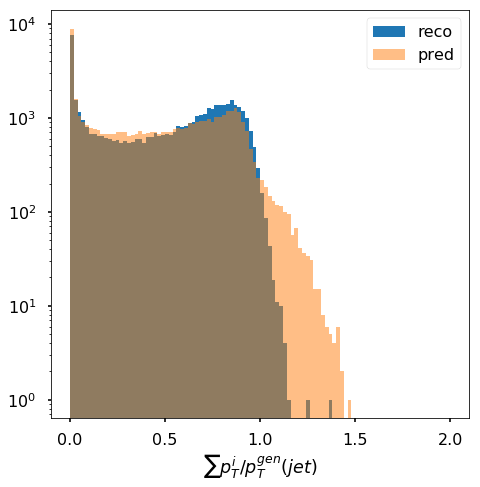

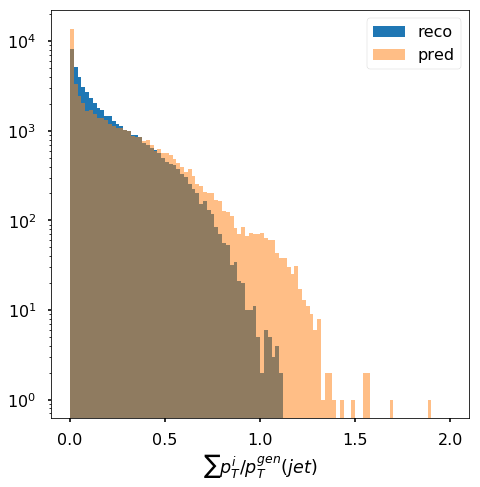

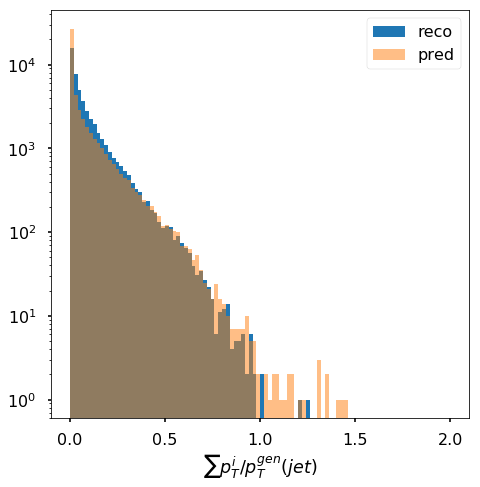

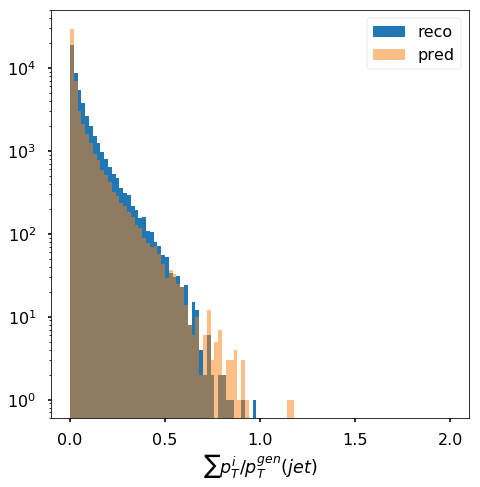

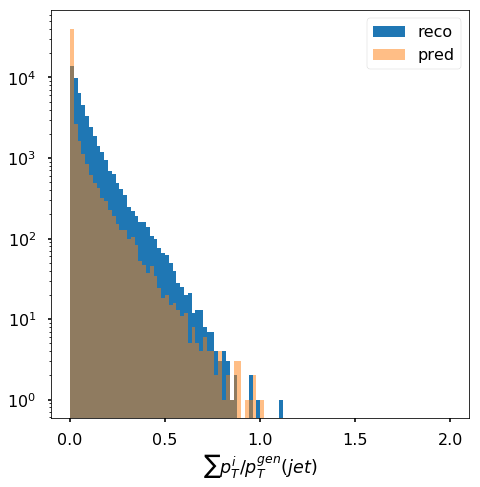

In [202]:
plotting.distrib_pred(gen,reco,pred_noscl,title='all $\Delta R$')
plt.savefig('%s/sum_pred.png' % plots_folder)
for iring,(ring,mask) in enumerate(zip(rings,ring_masks)):
    plotting.distrib_pred(gen,reco,pred_noscl,mask,title="$%1.1f < \Delta R < %1.1f$" % ring )
    plt.savefig('%s/sum_pred_%d.png' % (plots_folder, iring ) )

In [203]:
cond = inputs_test[1][:pred.shape[0]]
weights = w_test[:pred.shape[0]]

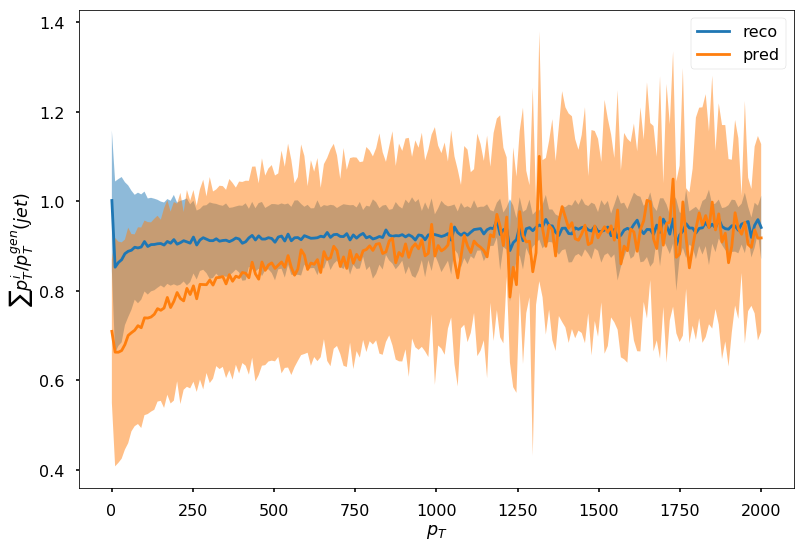

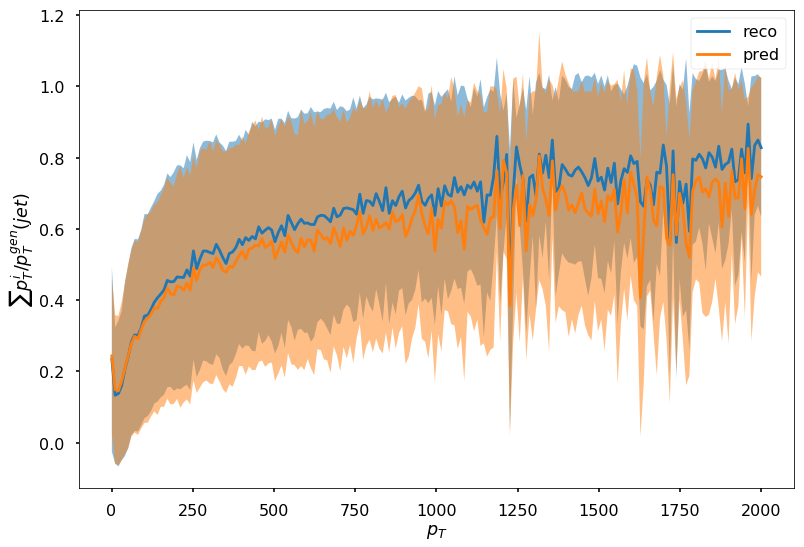

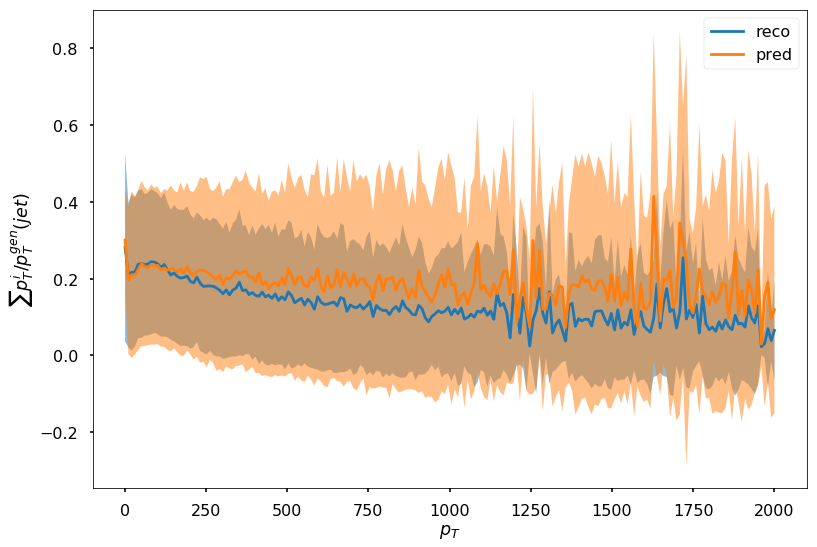

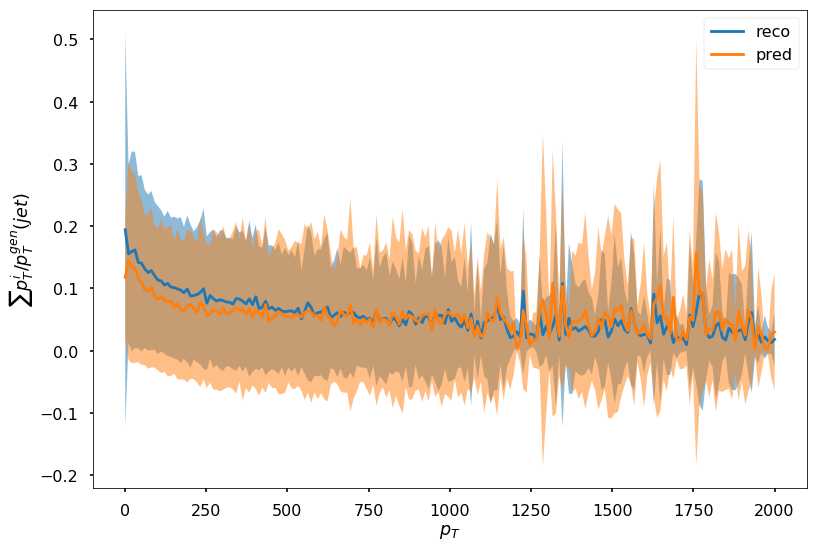

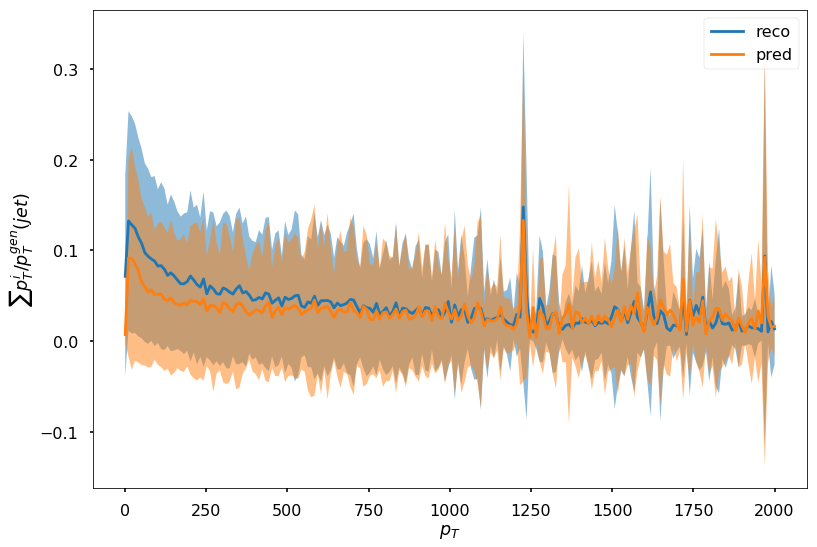

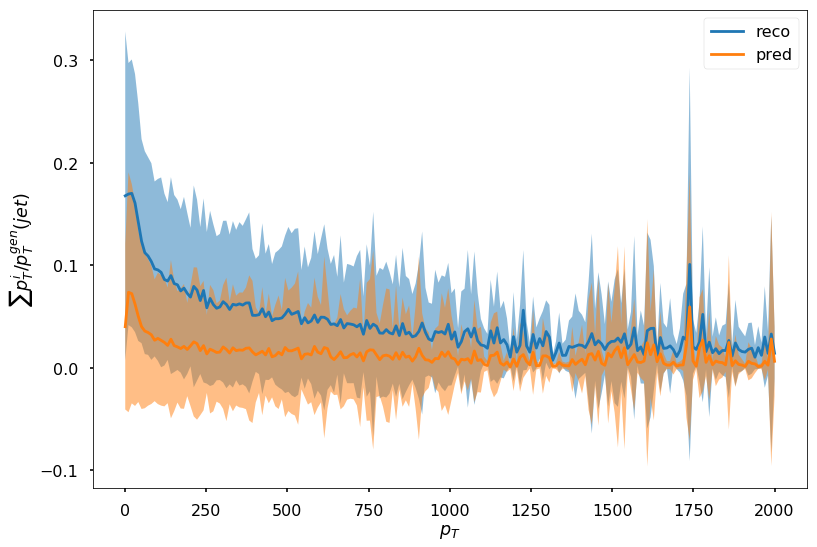

In [204]:
plotting.show_moments(reco,pred_noscl,cond[:,0,0],np.linspace(1,2000,200),xlabel='$p_T$',weights=weights)
plt.savefig('%s/pt_dep_pred.png' % plots_folder)
plt.show()
for iring,(ring,mask) in enumerate(zip(rings,ring_masks)):
    #distrib_pred(gen,reco,pred,mask)
    plotting.show_moments(reco,pred_noscl,cond[:,0,0],np.linspace(1,2000,200),mask=mask,xlabel='$p_T$',weights=weights)
    plt.savefig('%s/pt_dep_pred_%d.png' % (plots_folder,iring) )
    plt.show()

In [205]:
# pred_axis_x = (pred[:,:,:,0] * x).sum(axis=(1,2)) / pred[:,:,:,0].sum(axis=(1,2))
# pred_axis_y = (pred[:,:,:,0] * y).sum(axis=(1,2)) / pred[:,:,:,0].sum(axis=(1,2))

In [206]:
# reco_axis_x = (reco[:,:,:,0] * x).sum(axis=(1,2)) / reco[:,:,:,0].sum(axis=(1,2))
# reco_axis_y = (reco[:,:,:,0] * y).sum(axis=(1,2)) / reco[:,:,:,0].sum(axis=(1,2))

In [207]:
# gen_axis_x = (gen[:,:,:,0] * x).sum(axis=(1,2)) / gen[:,:,:,0].sum(axis=(1,2))
# gen_axis_y = (gen[:,:,:,0] * y).sum(axis=(1,2)) / gen[:,:,:,0].sum(axis=(1,2))

In [208]:
# plt.figure(figsize=(15,7.5))
# plt.subplot(121)
# plt.hist2d(pred_axis_x-gen_axis_x,pred_axis_y-gen_axis_y,bins=100,cmap='Blues',range=[[-2,2],[-2,2]],norm=LogNorm());
# plt.subplot(122)
# plt.hist2d(reco_axis_x-gen_axis_x,reco_axis_y-gen_axis_y,bins=100,cmap='Reds',alpha=0.5,range=[[-2,2],[-2,2]],norm=LogNorm());

In [209]:
# x, y= np.ogrid[-16:17,-16:17]
# radius = np.sqrt( (x+0.5)**2 + (y+0.5)**2 )

# radius[ radius == 0. ] = 1.

# radius = radius.max() / radius

# radius *= (33*33) / radius.sum()

In [210]:
# plt.imshow(radius,norm=LogNorm())
# plt.colorbar()

In [211]:
! rsync -av --delete plots/ lxplus.cern.ch:www/gan/pix2pix

sending incremental file list
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred0_36838.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred0_42417.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred0_46871.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred0_8677.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred1_36838.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred1_42417.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred1_46871.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred1_8677.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred2_36838.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred2_42417.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1/4/jet_pred2_46871.png
unnorm_nt4_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw